# Droplets-in-a-Vortex Example
* This is part of the [Cortix](https://github.com/dpploy/cortix) Notebook [guides](https://github.com/dpploy/cortix-nb)
([index](https://github.com/dpploy/cortix-nb/blob/master/droplet.ipynb)).
* Select each of the cells below and run them sequentially (use the run button, `>|` on the tool bar or use the `Cell` option on the menu bar).
* Alternatively, on the menu bar run all cells: `Cell -> Run All`.

In [1]:
# Import various packages; must have the Cortix repository installed

import matplotlib.pyplot as plt

try:
    import cortix  # creates the `name` cortix
except ImportError:
    print('Installing the "cortix" package...')
    print('')
    !pip install cortix
    import cortix

from cortix.src.module import Module
from cortix.src.cortix_main import Cortix

# Import the example modules
from cortix.examples.dataplot import DataPlot
from cortix.examples.vortex import Vortex
from cortix.examples.droplet import Droplet

In [2]:
# Create a Cortix object with Python multiprocessing

cortix = Cortix(use_mpi=False,splash=False)

# Set parameters in SI units

n_droplets = 5
end_time = 300
time_step = 0.1

[8894] 2019-08-01 01:30:58,759 - cortix - INFO - Created Cortix object


## Write the run context

In [3]:
# Create the application network

# Vortex module (single)
vortex = Vortex()
cortix.add_module(vortex)
vortex.show_time = (True,100)
vortex.end_time = end_time
vortex.time_step = time_step
vortex.plot_velocity()

# DataPlot module (single)
data_plot = DataPlot()
cortix.add_module(data_plot)
data_plot.title = 'Droplet Trajectories'
data_plot.same_axes = True
data_plot.dpi = 300

for i in range(n_droplets):
    
    # Droplet modules (multiple)
    droplet = Droplet()
    cortix.add_module(droplet)
    droplet.end_time = end_time
    droplet.time_step = time_step
    droplet.bounce = False
    droplet.slip = False
    
    droplet.connect('external-flow', vortex.get_port('fluid-flow:{}'.format(i)))
    droplet.connect('visualization', data_plot.get_port('viz-data:{:05}'.format(i)))

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


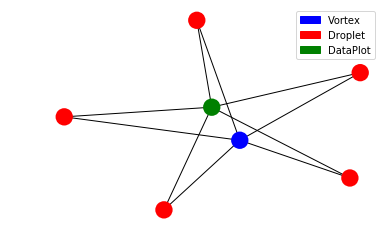

In [4]:
# View the Cortix network created

cortix.draw_network()
plt.show()

## Run network simulation

In [5]:
# Run the simulation!

cortix.run()

[8894] 2019-08-01 01:30:59,138 - cortix - INFO - Launching Module <cortix.examples.vortex.Vortex object at 0x1516b59898>
[8894] 2019-08-01 01:30:59,144 - cortix - INFO - Launching Module <cortix.examples.dataplot.DataPlot object at 0x1516b598d0>


Vortex::time[s] = 0.0


[8894] 2019-08-01 01:30:59,151 - cortix - INFO - Launching Module <cortix.examples.droplet.Droplet object at 0x1516e810b8>
[8894] 2019-08-01 01:30:59,160 - cortix - INFO - Launching Module <cortix.examples.droplet.Droplet object at 0x1517325b00>
[8894] 2019-08-01 01:30:59,167 - cortix - INFO - Launching Module <cortix.examples.droplet.Droplet object at 0x151732d9e8>
[8894] 2019-08-01 01:30:59,175 - cortix - INFO - Launching Module <cortix.examples.droplet.Droplet object at 0x1517336860>
[8894] 2019-08-01 01:30:59,183 - cortix - INFO - Launching Module <cortix.examples.droplet.Droplet object at 0x151733e470>


Vortex::time[s] = 10.0
Vortex::time[s] = 20.0
Vortex::time[s] = 30.0
Vortex::time[s] = 40.0
Vortex::time[s] = 50.0
Vortex::time[s] = 60.0
Vortex::time[s] = 70.0
Vortex::time[s] = 80.0
Vortex::time[s] = 90.0
Vortex::time[s] = 100.0
Vortex::time[s] = 110.0
Vortex::time[s] = 120.0
Vortex::time[s] = 130.0
Vortex::time[s] = 140.0
Vortex::time[s] = 150.0
Vortex::time[s] = 160.0
Vortex::time[s] = 170.0
Vortex::time[s] = 180.0
Vortex::time[s] = 190.0
Vortex::time[s] = 200.0
Vortex::time[s] = 210.0
Vortex::time[s] = 220.0
Vortex::time[s] = 230.0
Vortex::time[s] = 240.0
Vortex::time[s] = 250.0
Vortex::time[s] = 260.0
Vortex::time[s] = 270.0
Vortex::time[s] = 280.0
Vortex::time[s] = 290.0
Vortex::time[s] = 300.0


## Plot results

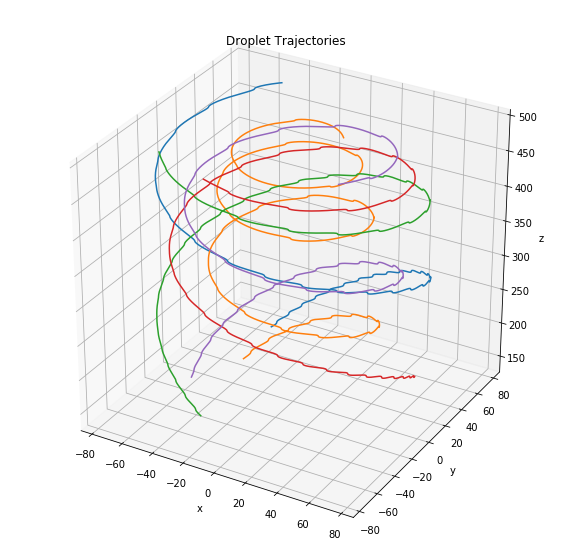

In [6]:
# Plot the trajectories of all droplets in the vortex flow

import pickle
data = pickle.load(open(data_plot.data_file_name,'rb'))
plt.rcParams['figure.figsize'] = [10,10]
data_plot.plot_data(data)
plt.show()

In [12]:
'''Working in progress'''

droplet_1 = cortix.modules[2]
liq_phase = droplet_1.liquid_phase # data is lost